ccc

In [ ]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.5 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=6fbb82e50532b3eb898726696bf4d4eb02b8a8b7ebba011de20ea5b007947293
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox, kstest, skew, ttest_ind, f_oneway, ks_2samp
from scipy import stats as mstats
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from tpot import TPOTClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Membaca data dari file Excel
data = pd.read_excel('https://raw.github.com/mazenbuk/ppm/main/dataset_project3.xlsx')

# Simpan data ke CSV untuk kemudahan akses
csv_file = 'dataset_project3.csv'
data.to_csv(csv_file, index=False, sep=',', encoding='utf-8')

# Baca ulang dari CSV
df = pd.read_csv(csv_file, delimiter=",")
df.head()

,contrast-1-0,correlation-1-0,dissimilarity-1-0,contrast-1-45,correlation-1-45,dissimilarity-1-45,contrast-1-90,correlation-1-90,dissimilarity-1-90,contrast-1-135,correlation-1-135,dissimilarity-1-135,Class
0,10.541252,0.997390,1.246816,24.404711,0.993967,1.733760,20.763117,0.994862,1.442313,25.495182,0.993697,1.723876,1
1,9.659018,0.997369,1.163762,22.457277,0.993891,1.654415,15.695636,0.995726,1.323746,19.458658,0.994707,1.618708,1
2,8.915220,0.997405,1.070119,17.622592,0.994877,1.412638,13.601010,0.996042,1.107091,19.837377,0.994233,1.425450,1
3,8.609025,0.997328,1.044536,17.402866,0.994606,1.390991,12.071361,0.996255,1.050541,17.983701,0.994426,1.375565,1
4,6.703944,0.997493,0.935786,13.865566,0.994822,1.260165,9.653975,0.996391,0.977596,13.670599,0.994895,1.252951,1


In [ ]:
# Informasi Dasar Dataset
print("===== INFORMASI DASAR DATASET =====")
print(f"Jumlah Total Sampel: {len(df)}")
print(f"Jumlah Fitur: {len(df.columns)}")
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)

===== INFORMASI DASAR DATASET =====
Jumlah Total Sampel: 5656
Jumlah Fitur: 13

Tipe Data Setiap Kolom:
contrast-1-0           float64
correlation-1-0        float64
dissimilarity-1-0      float64
contrast-1-45          float64
correlation-1-45       float64
dissimilarity-1-45     float64
contrast-1-90          float64
correlation-1-90       float64
dissimilarity-1-90     float64
contrast-1-135         float64
correlation-1-135      float64
dissimilarity-1-135    float64
Class                    int64
dtype: object


In [ ]:
# Statistik Deskriptif
print("===== STATISTIK DESKRIPTIF =====")
deskriptif = df.describe()
print(deskriptif)

===== STATISTIK DESKRIPTIF =====
       contrast-1-0  correlation-1-0  dissimilarity-1-0  contrast-1-45  \
count   5656.000000      5656.000000        5656.000000    5656.000000   
mean       9.908253         0.996817           1.136209      21.182828   
std        6.816168         0.001654           0.298778      11.668408   
min        1.327471         0.988193           0.532603       3.033486   
25%        5.536965         0.996039           0.938455      13.511979   
50%        7.539260         0.997146           1.050275      17.358486   
75%       11.566375         0.998053           1.246821      24.698275   
max       45.287312         0.999681           2.394049      77.027679   

       correlation-1-45  dissimilarity-1-45  contrast-1-90  correlation-1-90  \
count       5656.000000         5656.000000    5656.000000       5656.000000   
mean           0.993114            1.567504      16.037594          0.994803   
std            0.002820            0.366408       9.071871  

===== PROPORSI KELAS TARGET =====
Class
1    0.194130
2    0.192185
4    0.169024
3    0.166902
6    0.149576
5    0.128182
Name: proportion, dtype: float64


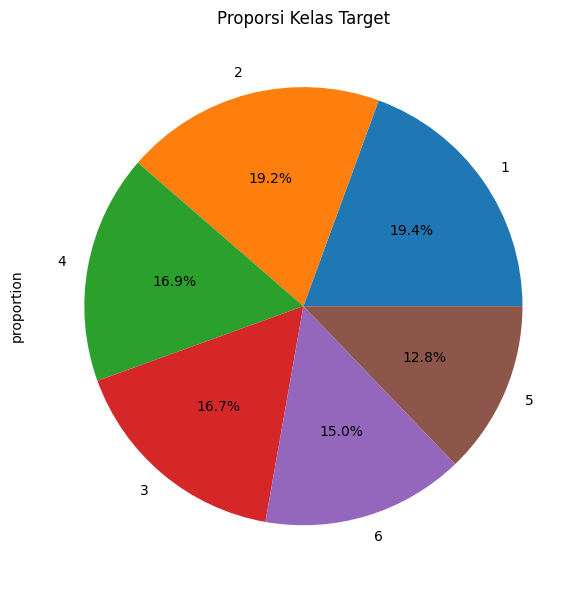

In [ ]:
# Proporsi Kelas Target dengan Visualisasi
print("===== PROPORSI KELAS TARGET =====")
proporsi_kelas = df['Class'].value_counts(normalize=True)
print(proporsi_kelas)
plt.figure(figsize=(10, 6))
proporsi_kelas.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporsi Kelas Target')
plt.tight_layout()
plt.show()

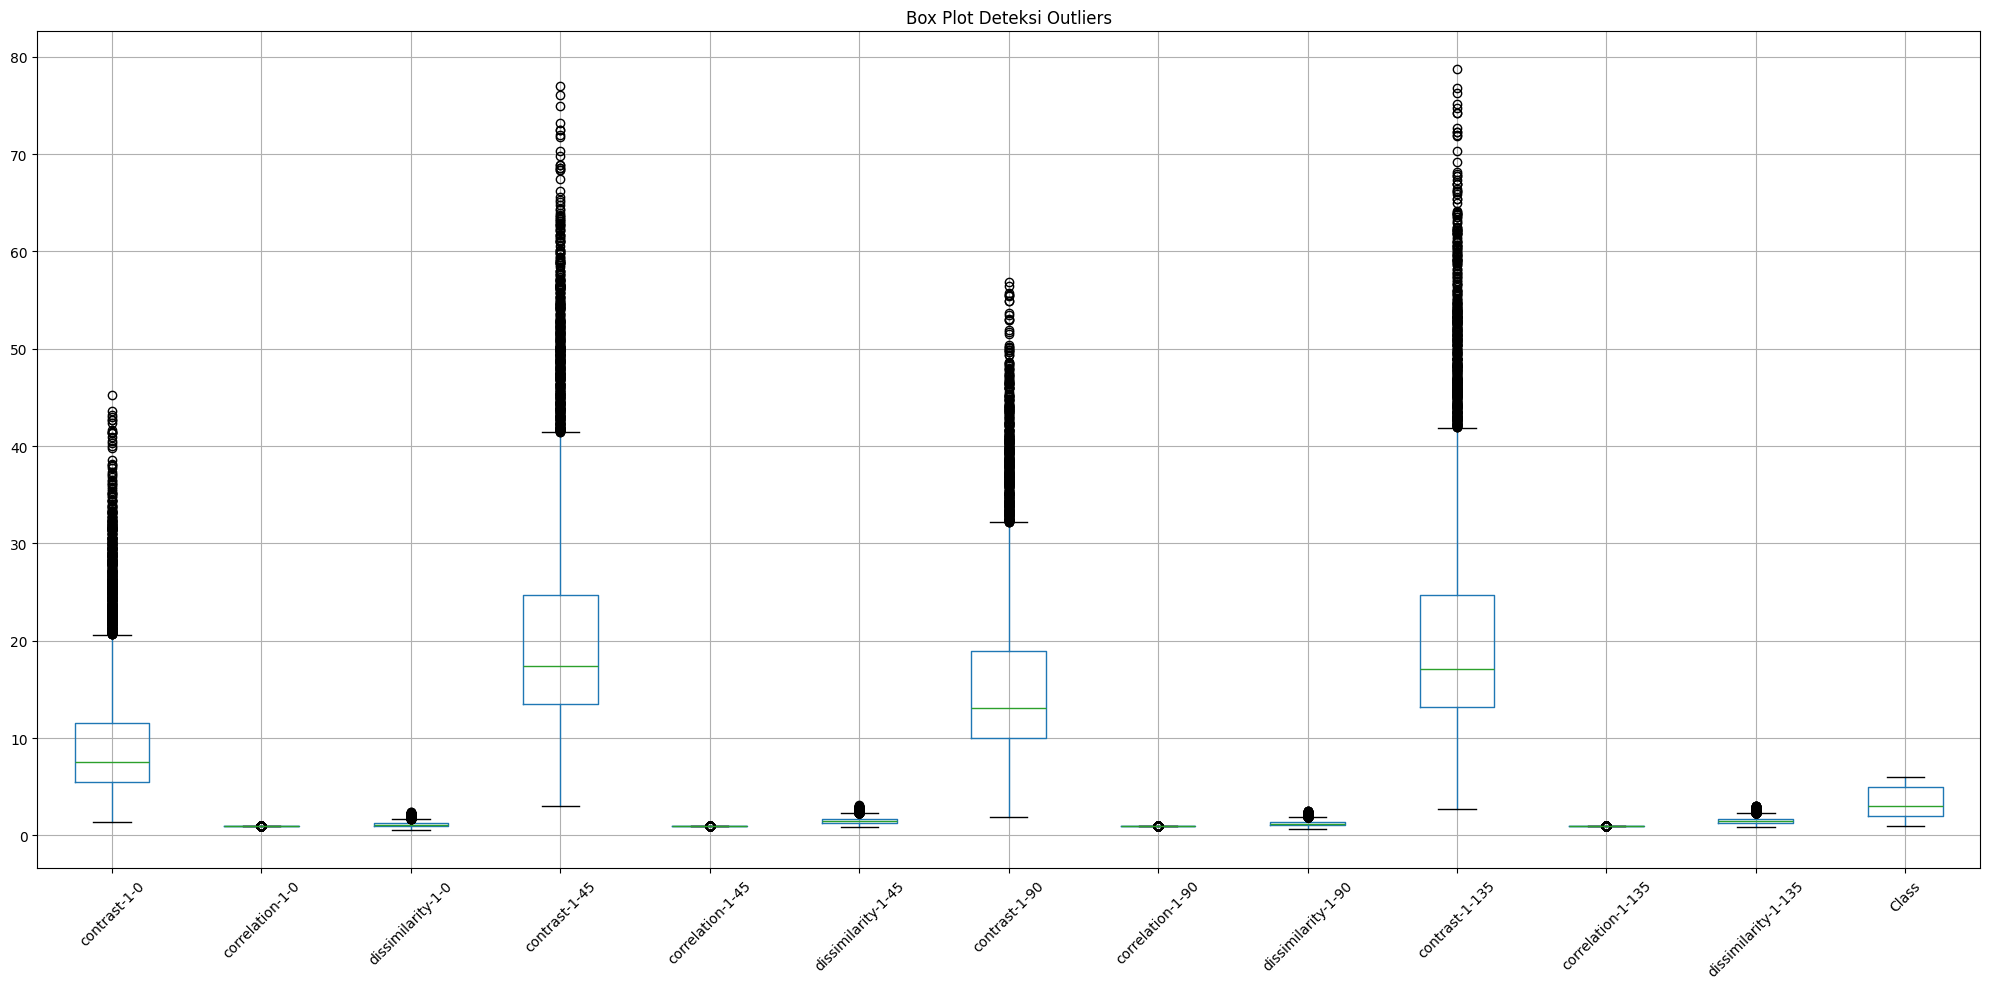

In [ ]:
# Deteksi Outliers dengan Box Plot Interaktif
plt.figure(figsize=(20, 10))
df.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title('Box Plot Deteksi Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

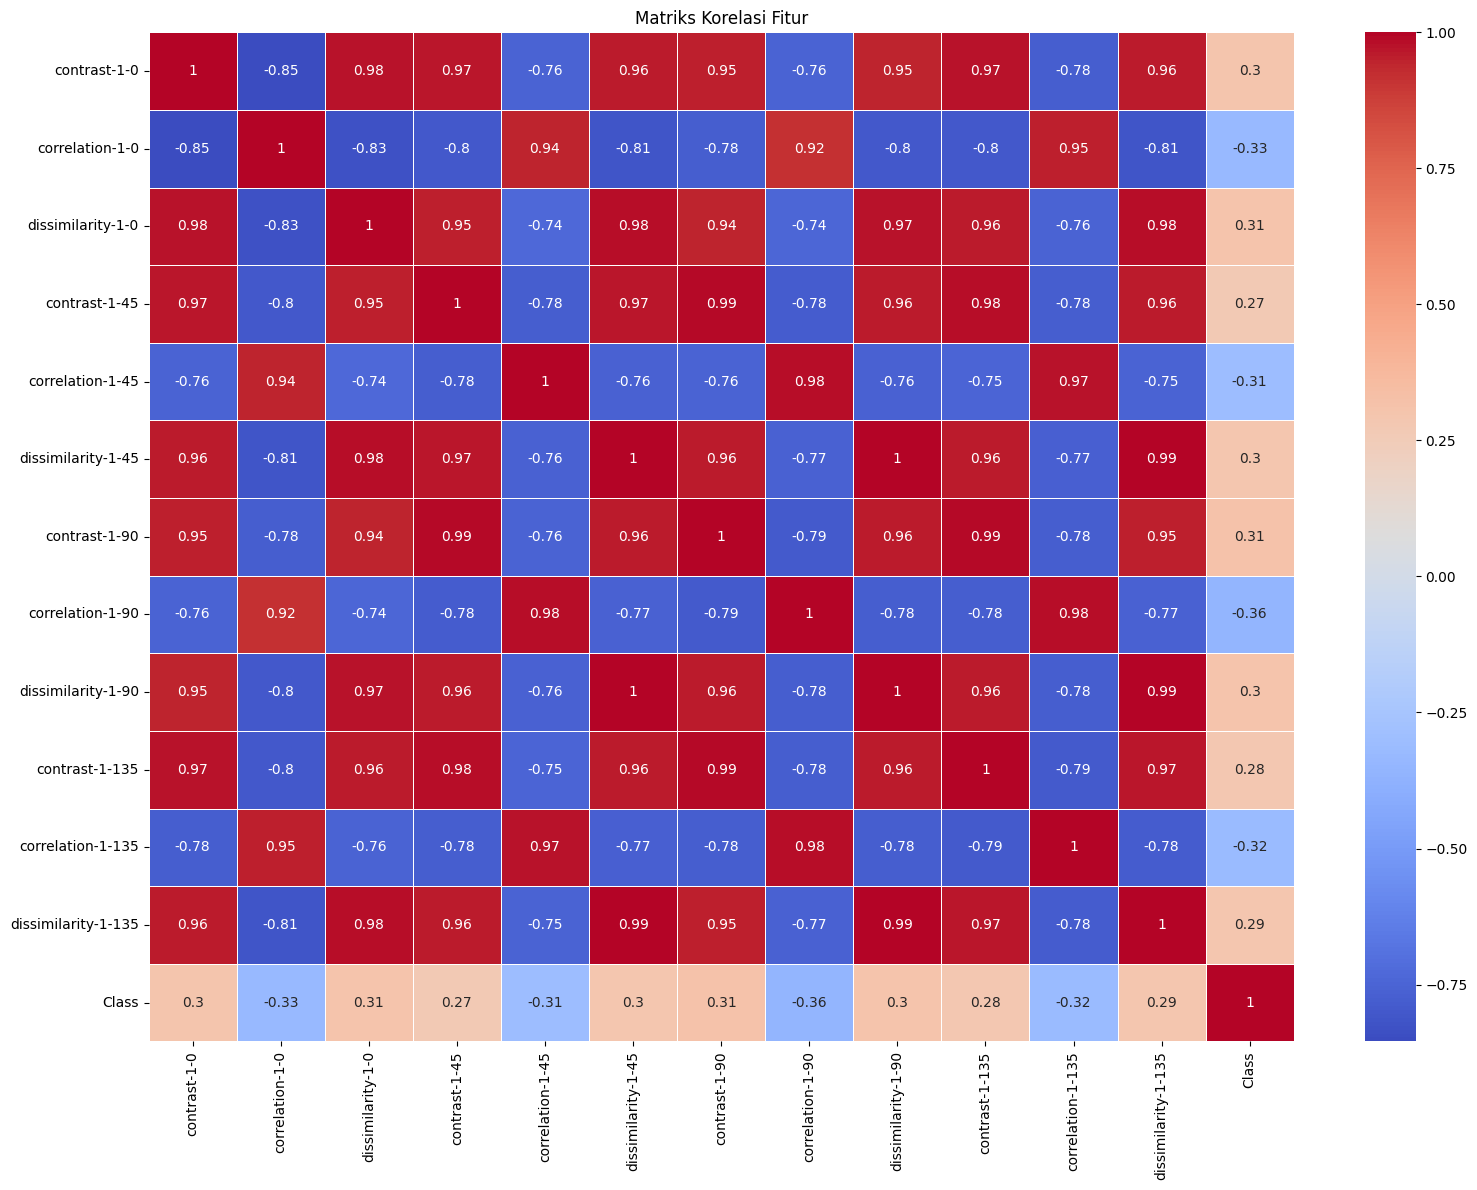

In [ ]:
# Korelasi Antar Fitur dengan Heatmap
plt.figure(figsize=(16, 12))
korelasi = df.corr()
sns.heatmap(korelasi, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.tight_layout()
plt.show()

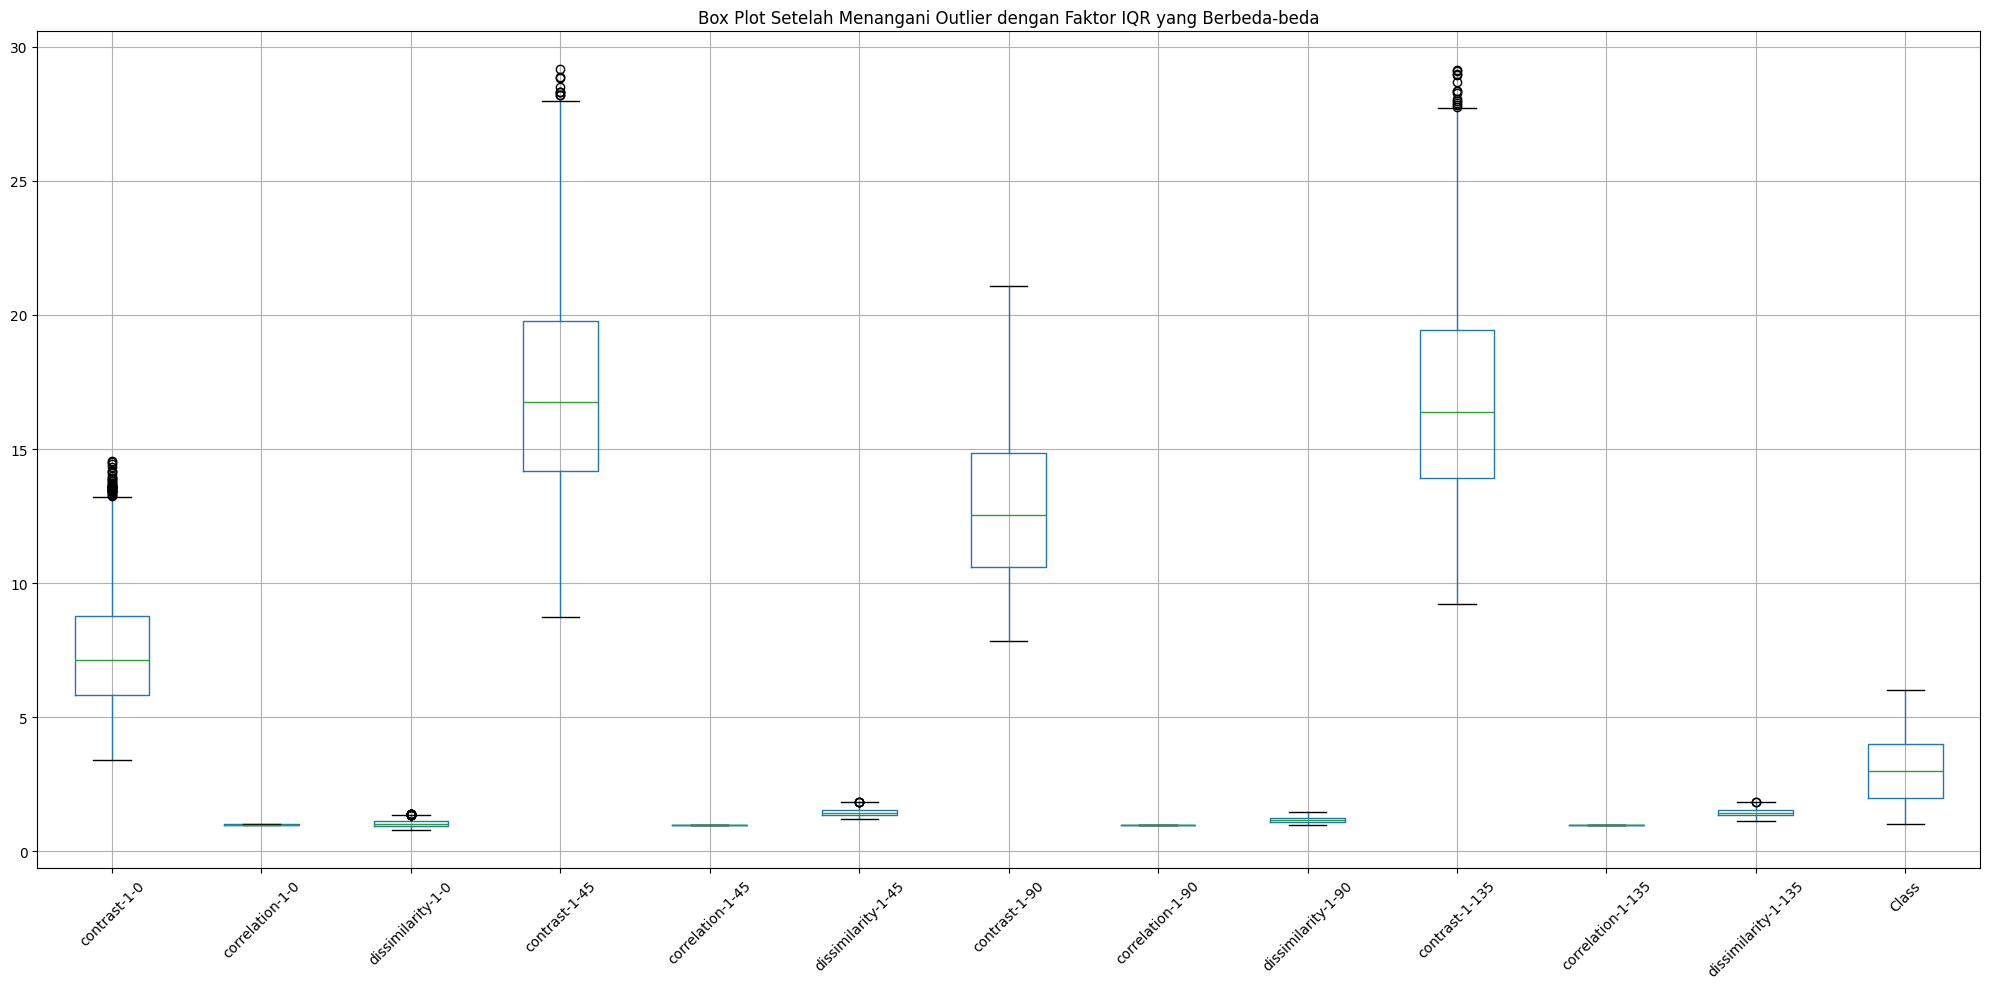

In [ ]:
# Calculate Q1, Q3, and IQR for each numeric feature
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Set custom IQR factors for each feature
iqr_factors = {
    'contrast-1-0': 0.5,
    'correlation-1-0': 0.5,
    'dissimilarity-1-0': 0.5,
    'contrast-1-45': 0.75,
    'correlation-1-45': 0.75,
    'dissimilarity-1-45': 0.75,
    'contrast-1-90': 0.25,
    'correlation-1-90': 0.25,
    'dissimilarity-1-90': 0.25,
    'contrast-1-135': 0.5,
    'correlation-1-135': 0.5,
    'dissimilarity-1-135': 0.5
}

# Determine the lower and upper bounds for each feature
lower = pd.Series(index=df.columns)
upper = pd.Series(index=df.columns)

# Exclude the 'Class' column from outlier handling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('Class')  # Exclude 'Class'

for col in numerical_features: # Iterate through numerical features excluding 'Class'
    if col in iqr_factors: # Only process columns that are in iqr_factors
        lower[col] = q1[col] - iqr[col] * iqr_factors[col]
        upper[col] = q3[col] + iqr[col] * iqr_factors[col]

# Identify and handle outliers
df_clean = df.loc[(df[numerical_features] < upper[numerical_features]).all(axis=1) & (df[numerical_features] > lower[numerical_features]).all(axis=1)]

# Visualize the box plot after handling outliers
plt.figure(figsize=(20, 10))
df_clean.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title('Box Plot Setelah Menangani Outlier dengan Faktor IQR yang Berbeda-beda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Splitt Data dan Pengecekan Distribusi
X = df_clean.drop(columns=["Class"])
y = df_clean["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

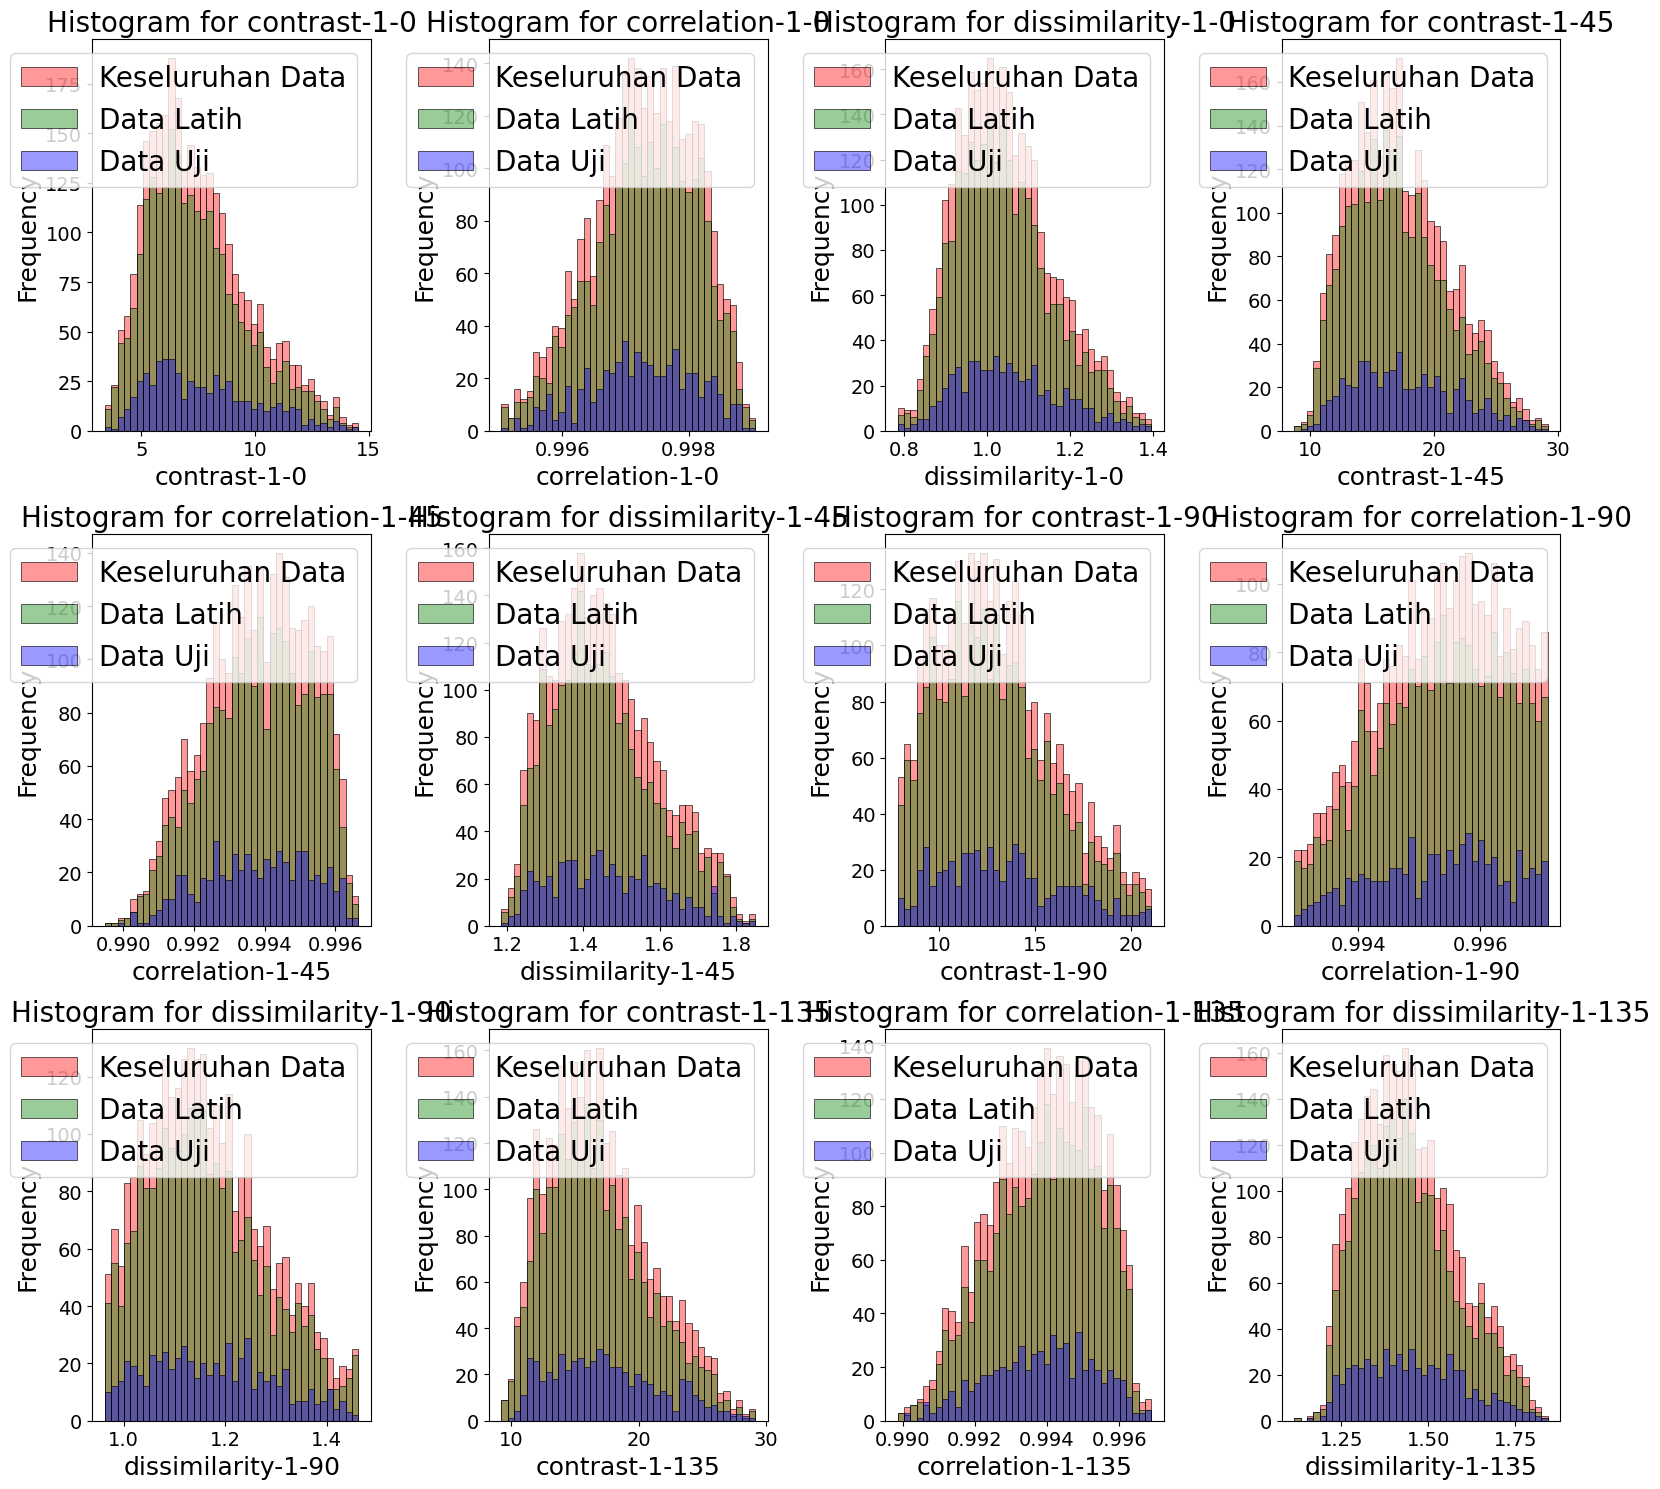

In [ ]:
def plot_histograms(features, overall_data, train_data, test_data, bins=40, selected_features=None):
    # Use selected features if provided, otherwise default to all features
    features_to_plot = selected_features if selected_features else features

    num_features = len(features_to_plot)
    num_cols = 4
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows for grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))
    axes = axes.flatten()  # Flatten axes for easy indexing

    for i, feature in enumerate(features_to_plot):
        ax = axes[i]

        # Compute common bin edges for consistent alignment
        min_value = min(overall_data[feature].min(), train_data[feature].min(), test_data[feature].min())
        max_value = max(overall_data[feature].max(), train_data[feature].max(), test_data[feature].max())
        bin_edges = np.linspace(min_value, max_value, bins + 1)

        # Histogram with aligned bins
        sns.histplot(overall_data[feature], color="red", alpha=0.4, bins=bin_edges, label="Keseluruhan Data", ax=ax)
        sns.histplot(train_data[feature], color="green", alpha=0.4, bins=bin_edges, label="Data Latih", ax=ax)
        sns.histplot(test_data[feature], color="blue", alpha=0.4, bins=bin_edges, label="Data Uji", ax=ax)

        ax.set_title(f"Histogram for {feature}", fontsize=20)  # Increase font size for title
        ax.set_xlabel(feature, fontsize=18)  # Increase font size for x-axis labels
        ax.set_ylabel('Frequency', fontsize=18)  # Increase font size for y-axis labels
        ax.legend(fontsize=20)  # Increase font size for legend

        # Adjusting tick label font size
        ax.tick_params(axis='both', labelsize=14)  # Adjust size of x and y tick numbers

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Plot selected features
plot_histograms(X.columns, X, X_train, X_test)


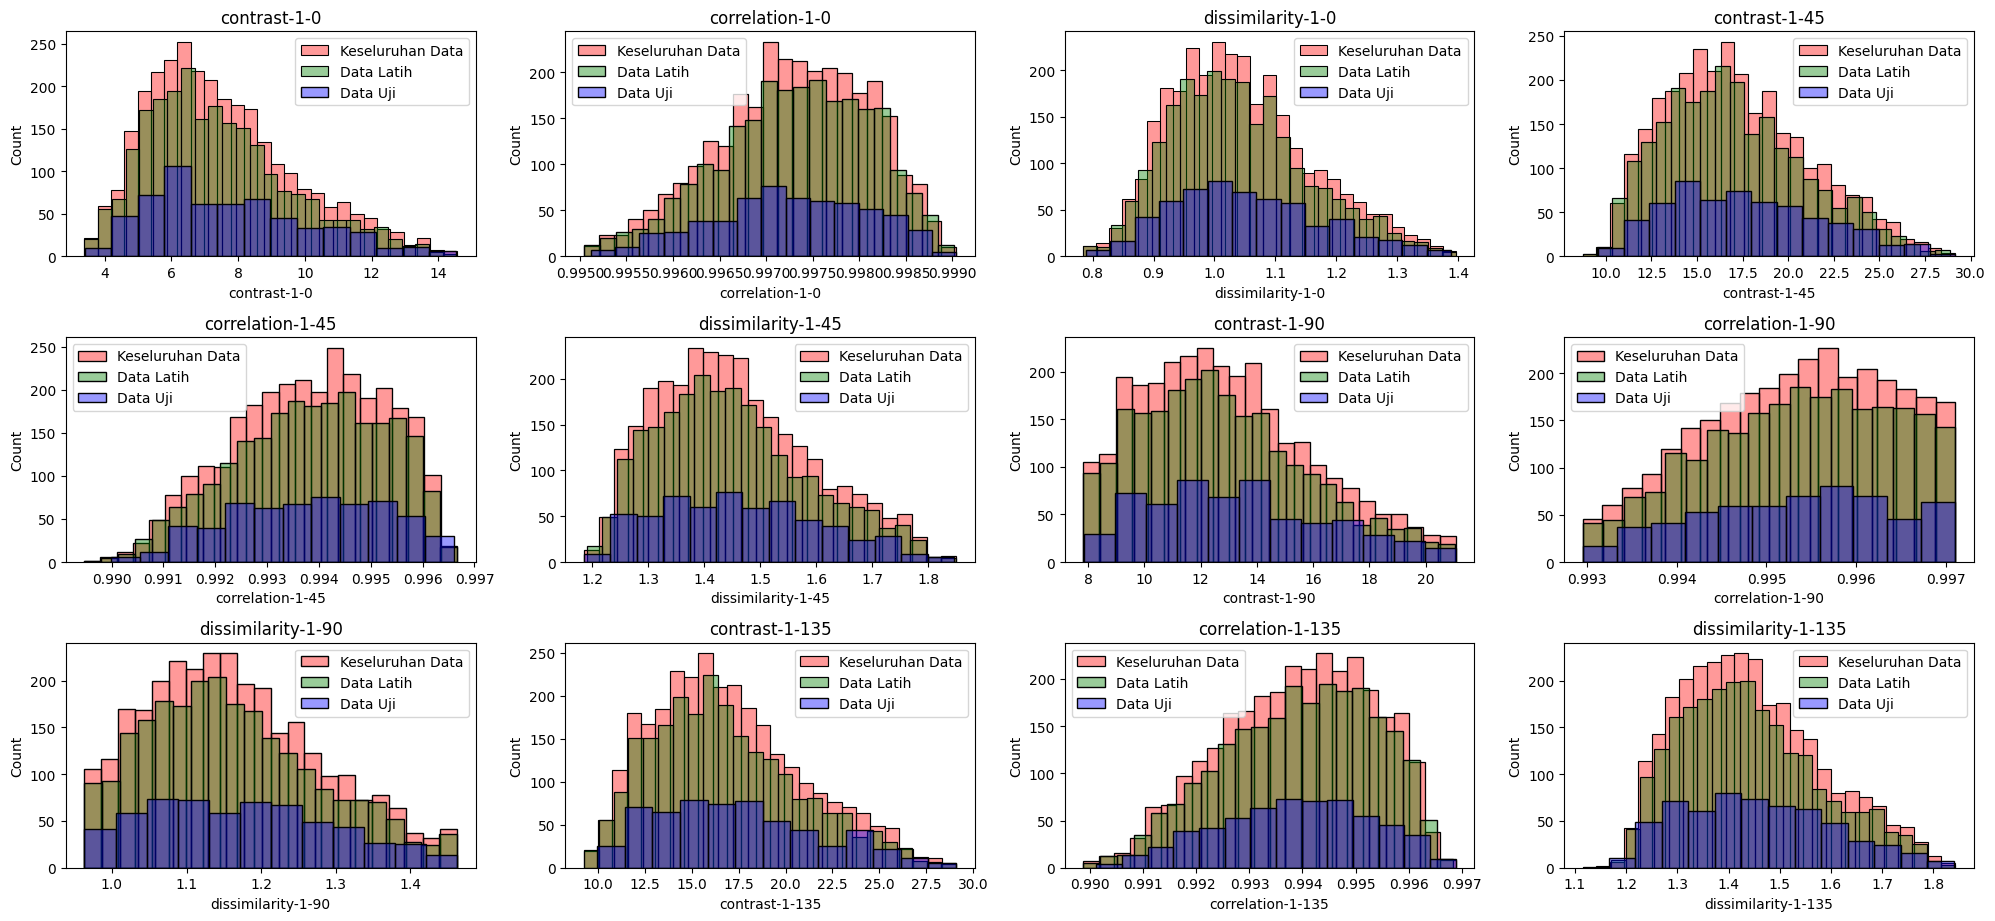

In [ ]:
# Plot Distribusi Fitur
def plot_distributions(features, overall_data, train_data, test_data):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features, 1):
        plt.subplot(5, 4, i)
        sns.histplot(overall_data[feature], color='red', alpha=0.4, label='Keseluruhan Data')
        sns.histplot(train_data[feature], color='green', alpha=0.4, label='Data Latih')
        sns.histplot(test_data[feature], color='blue', alpha=0.4, label='Data Uji')
        plt.title(feature)
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_distributions(X.columns, X, X_train, X_test)

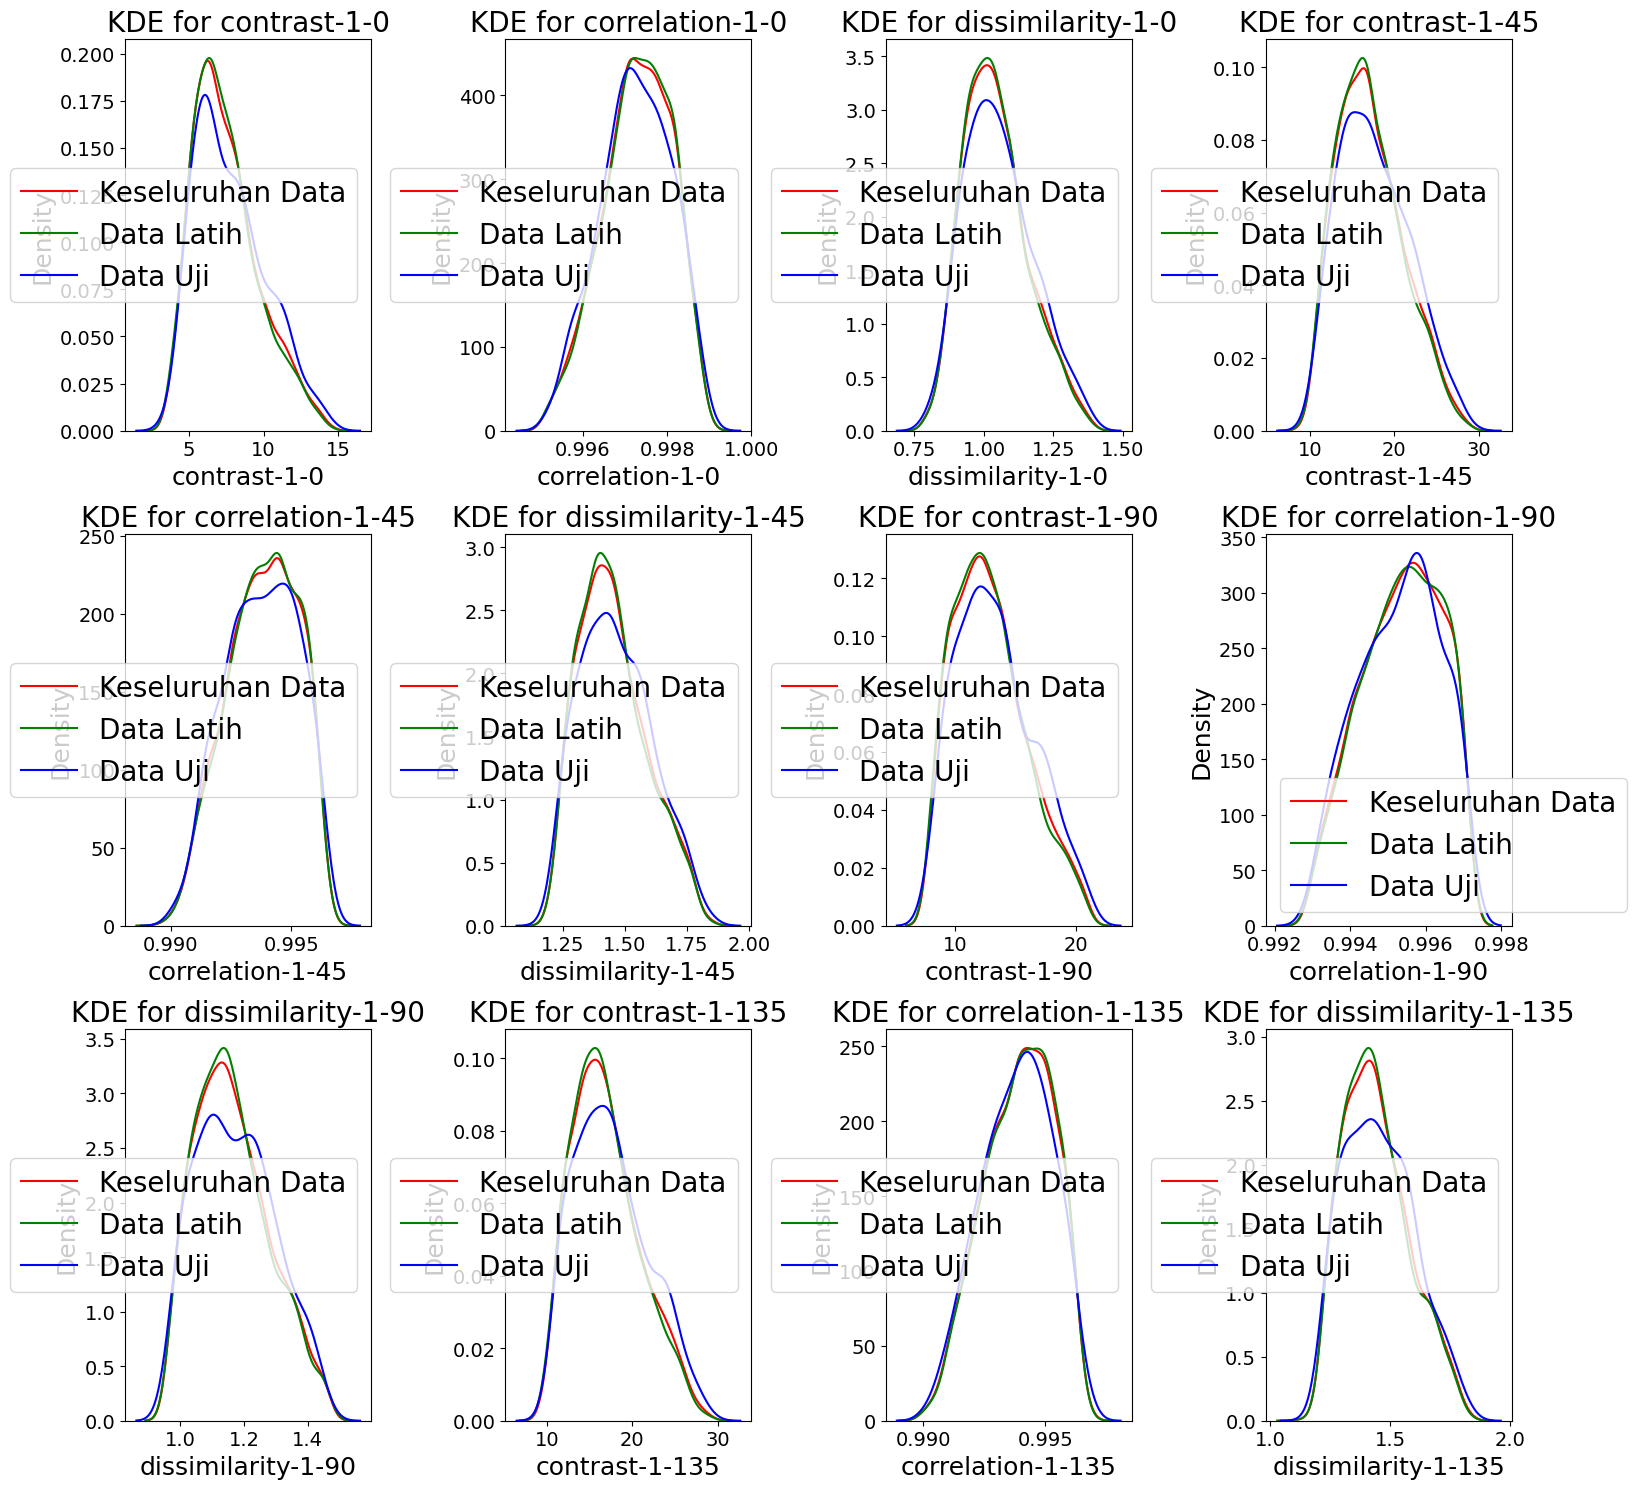

In [ ]:
def plot_kde(features, overall_data, train_data, test_data, selected_features=None):
    # Use selected features if provided, otherwise default to all features
    features_to_plot = selected_features if selected_features else features

    num_features = len(features_to_plot)
    num_cols = 4
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows for grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))
    axes = axes.flatten()  # Flatten axes for easy indexing

    for i, feature in enumerate(features_to_plot):
        ax = axes[i]

        # KDE plots
        sns.kdeplot(overall_data[feature], color="red", label="Keseluruhan Data", ax=ax)
        sns.kdeplot(train_data[feature], color="green", label="Data Latih", ax=ax)
        sns.kdeplot(test_data[feature], color="blue", label="Data Uji", ax=ax)

        ax.set_title(f"KDE for {feature}", fontsize=20)
        ax.set_xlabel(feature, fontsize=18)
        ax.set_ylabel('Density', fontsize=18)
        ax.legend(fontsize=20)
        ax.tick_params(axis='both', labelsize=14)  # Adjust tick label font size

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Plot selected features
plot_kde(X.columns, X, X_train, X_test)

In [ ]:
# Function to perform KS test and return results
def ks_test_overall_vs_training(features, overall_data, train_data, significance_level=0.05):
    results = []

    for feature in features:
        # Perform KS test
        statistic, p_value = ks_2samp(overall_data[feature], train_data[feature])

        # Check if distributions are similar (p-value > significance level)
        is_similar = p_value > significance_level

        # Append results
        results.append({
            "Feature": feature,
            "KS Statistic": statistic,
            "P-Value": p_value,
            "Similar": is_similar
        })

    # Convert to DataFrame
    return pd.DataFrame(results)

# Perform the KS test
ks_results = ks_test_overall_vs_training(X.columns, X, X_train)

ks_results.to_excel("./ks_results.xlsx")

# Display the results
ks_results

,Feature,KS Statistic,P-Value,Similar
0,contrast-1-0,0.016875,0.836364,True
1,correlation-1-0,0.009749,0.999468,True
2,dissimilarity-1-0,0.013536,0.964739,True
3,contrast-1-45,0.016967,0.831514,True
4,correlation-1-45,0.008673,0.999948,True
5,dissimilarity-1-45,0.016799,0.840230,True
6,contrast-1-90,0.015941,0.882015,True
7,correlation-1-90,0.008156,0.999988,True
8,dissimilarity-1-90,0.017209,0.818705,True
9,contrast-1-135,0.016945,0.832810,True


In [ ]:
def analyze_normality_and_skewness(data):
    results = []

    for feature in data.columns:
        # Perform KS test against a normal distribution
        ks_stat, ks_p_value = kstest(data[feature], 'norm', args=(data[feature].mean(), data[feature].std()))
        is_normal_ks = ks_p_value >= 0.05

        # Compute skewness
        feature_skewness = skew(data[feature])
        is_normal_skew = -0.5 <= feature_skewness <= 0.5  # Threshold for approximate normality
        normal = feature_skewness and is_normal_skew

        # Append results
        results.append({
            "Feature": feature,
            "KS_p_value": ks_p_value,
            "Skewness": feature_skewness,
            "Normal": normal
        })

    # Create a DataFrame from results
    return pd.DataFrame(results)

In [ ]:
def apply_boxcox_transformation(data):
    transformed_data = data.copy()
    for col in transformed_data.columns:
        if (transformed_data[col] > 0).all():
            transformed_data[col], _ = boxcox(transformed_data[col] + 1e-8)
    return transformed_data

In [ ]:
def apply_log_transformation(data):
    transformed_data = data.copy()
    for col in transformed_data.columns:
        if (transformed_data[col] > 0).all():
            transformed_data[col] = np.log1p(transformed_data[col])
    return transformed_data

In [ ]:
def apply_sqrt_transformation(data):
    transformed_data = data.copy()
    for col in transformed_data.columns:
        if (transformed_data[col] >= 0).all():
            transformed_data[col] = np.sqrt(transformed_data[col])
    return transformed_data

In [ ]:
def apply_arc_sin_transformation(data):
    transformed_data = data.copy()
    numeric_cols = transformed_data.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        try:
            transformed_data[col] = np.arcsin(transformed_data[col])
        except Exception as e:
            print(f"Normalisasi Arc Sin gagal untuk kolom '{col}': {e}")

    return transformed_data

In [ ]:
def apply_yeo_johnson_transformation(data):
    # Create a copy of the data to avoid modifying the original DataFrame
    transformed_data = data.copy()

    # Identify numeric columns
    numeric_cols = transformed_data.select_dtypes(include=['number']).columns

    # Apply Yeo-Johnson transformation using stats.yeojohnson
    for col in numeric_cols:
        transformed_data[col], _ = stats.yeojohnson(transformed_data[col])

    return transformed_data

# Raw

In [ ]:
normality_results = analyze_normality_and_skewness(X_train)
normality_results

,Feature,KS_p_value,Skewness,Normal
0,contrast-1-0,6.521356e-11,0.706650,False
1,correlation-1-0,1.599958e-03,-0.342511,True
2,dissimilarity-1-0,3.320856e-05,0.514750,False
3,contrast-1-45,5.475939e-06,0.483419,True
4,correlation-1-45,1.263096e-04,-0.295321,True
5,dissimilarity-1-45,1.123786e-06,0.508232,False
6,contrast-1-90,6.012455e-06,0.524750,False
7,correlation-1-90,5.369402e-06,-0.270044,True
8,dissimilarity-1-90,1.794553e-06,0.486903,True
9,contrast-1-135,2.402572e-07,0.544470,False


# BoxCox

In [ ]:
# Apply Box-Cox transformation
X_train_boxcox = apply_boxcox_transformation(X_train)

In [ ]:
box_cox_normality_results = analyze_normality_and_skewness(X_train_boxcox)
box_cox_normality_results

,Feature,KS_p_value,Skewness,Normal
0,contrast-1-0,0.449371,0.004604,True
1,correlation-1-0,0.029791,-0.032218,True
2,dissimilarity-1-0,0.390466,0.014691,True
3,contrast-1-45,0.181637,0.001507,True
4,correlation-1-45,0.000768,-0.041371,True
5,dissimilarity-1-45,0.057394,0.035523,True
6,contrast-1-90,0.009561,0.008352,True
7,correlation-1-90,0.000131,-0.045695,True
8,dissimilarity-1-90,0.070634,0.034029,True
9,contrast-1-135,0.247360,0.005324,True


# Log

In [ ]:
# Apply Log transformation
X_train_log = apply_log_transformation(X_train)

In [ ]:
log_normality_results = analyze_normality_and_skewness(X_train_log)
log_normality_results

,Feature,KS_p_value,Skewness,Normal
0,contrast-1-0,0.030708,0.149660,True
1,correlation-1-0,0.001577,-0.343382,True
2,dissimilarity-1-0,0.001907,0.382994,True
3,contrast-1-45,0.136684,0.043778,True
4,correlation-1-45,0.000120,-0.296646,True
5,dissimilarity-1-45,0.000045,0.399173,True
6,contrast-1-90,0.010355,0.108069,True
7,correlation-1-90,0.000005,-0.270898,True
8,dissimilarity-1-90,0.000245,0.382732,True
9,contrast-1-135,0.214361,0.089350,True


# Sqrt

In [ ]:
# Apply Square Root transformation
X_train_sqrt = apply_sqrt_transformation(X_train)

In [ ]:
sqrt_normality_results = analyze_normality_and_skewness(X_train_sqrt)
sqrt_normality_results

,Feature,KS_p_value,Skewness,Normal
0,contrast-1-0,0.000028,0.390277,True
1,correlation-1-0,0.001577,-0.343384,True
2,dissimilarity-1-0,0.001832,0.386554,True
3,contrast-1-45,0.020445,0.250215,True
4,correlation-1-45,0.000120,-0.296650,True
5,dissimilarity-1-45,0.000027,0.416673,True
6,contrast-1-90,0.004825,0.298329,True
7,correlation-1-90,0.000005,-0.270900,True
8,dissimilarity-1-90,0.000177,0.390749,True
9,contrast-1-135,0.003299,0.302900,True


#Arc Sin

In [ ]:
X_train_arcsin = apply_arc_sin_transformation(X_train)

In [ ]:
arcsin_normality_result = analyze_normality_and_skewness(X_train_arcsin)
arcsin_normality_result

,Feature,KS_p_value,Skewness,Normal
0,contrast-1-0,NaN,NaN,False
1,correlation-1-0,0.060565,-0.021328,True
2,dissimilarity-1-0,NaN,NaN,False
3,contrast-1-45,NaN,NaN,False
4,correlation-1-45,0.001316,-0.088229,True
5,dissimilarity-1-45,NaN,NaN,False
6,contrast-1-90,NaN,NaN,False
7,correlation-1-90,0.000120,-0.090688,True
8,dissimilarity-1-90,NaN,NaN,False
9,contrast-1-135,NaN,NaN,False


# Yeo Johnson

In [ ]:
X_train_yeo_johnson = apply_yeo_johnson_transformation(X_train)

In [ ]:
yeo_johnson_normality_result = analyze_normality_and_skewness(X_train_yeo_johnson)
yeo_johnson_normality_result

,Feature,KS_p_value,Skewness,Normal
0,contrast-1-0,0.398614,0.010475,True
1,correlation-1-0,0.007780,-0.247888,True
2,dissimilarity-1-0,0.322874,0.023505,True
3,contrast-1-45,0.171501,0.003917,True
4,correlation-1-45,0.000649,-0.152703,True
5,dissimilarity-1-45,0.047431,0.044439,True
6,contrast-1-90,0.008905,0.012023,True
7,correlation-1-90,0.000017,-0.177363,True
8,dissimilarity-1-90,0.060699,0.044813,True
9,contrast-1-135,0.238453,0.007851,True


# Hasil Normalitas Data

In [ ]:
# Manually input method names
method_names = [
    "Yeo-Johnson",
    "Log",
    "Sqrt",
    "Box-Cox",
    "Arc Sin"
]

# Define a function to combine results into the desired format
def combine_normality_results(*results, method_names):
    combined = []

    for result, method_name in zip(results, method_names):
        # Count the number of passed and failed features
        normalized_count = result["Normal"].sum()  # Count of normal features (True)
        failed_count = len(result) - normalized_count  # Count of failed features (False)

        combined.append({
            "Metode": method_name,
            "Fitur Normal": normalized_count,
            "Fitur Tidak Normal": failed_count
        })

    return pd.DataFrame(combined)

# Combine all the results
combined_results = combine_normality_results(
    box_cox_normality_results,
    log_normality_results,
    sqrt_normality_results,
    arcsin_normality_result,
    yeo_johnson_normality_result,
    method_names=method_names
)

# Display the final combined result
combined_results

,Metode,Fitur Normal,Fitur Tidak Normal
0,Yeo-Johnson,12,0
1,Log,12,0
2,Sqrt,12,0
3,Box-Cox,4,8
4,Arc Sin,12,0


#Klasifikasi

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Inisialisasi PowerTransformer untuk Yeo-Johnson
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Terapkan transformasi pada data fitur (X)
X_train_normalized = yeo_johnson_transformer.fit_transform(X_train)
X_test_normalized = yeo_johnson_transformer.transform(X_test)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42, bootstrap=True, criterion='entropy', max_features=0.65, min_samples_split=10)

# Parameter grid untuk tuning
n_estimators_list = [50, 100, 150, 200]
min_samples_leaf_list = [1, 2, 4, 6]

# Pipeline dengan FastICA dan RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # StandardScaler untuk normalisasi fitur
    ('ica', FastICA(tol=0.35)),            # FastICA untuk reduksi dimensi
    ('randomforestclassifier', rf)         # Model RandomForest
])

# Simpan hasil di dataframe
results = []

for n_estimators in n_estimators_list:
    for min_samples_leaf in min_samples_leaf_list:
        accuracies = []
        for i in range(5):  # Lakukan 5 kali pengujian untuk setiap kombinasi parameter
            rf.set_params(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf)
            pipeline.set_params(randomforestclassifier=rf)

            # Latih dan uji model
            pipeline.fit(X_train_normalized, y_train)
            y_pred = pipeline.predict(X_test_normalized)
            acc = accuracy_score(y_test, y_pred)
            accuracies.append(acc)

        # Rata-rata akurasi
        avg_accuracy = np.mean(accuracies)
        results.append({
            'n_estimators': n_estimators,
            'min_samples_leaf': min_samples_leaf,
            'Akurasi 1': f"{accuracies[0]:.2%}",
            'Akurasi 2': f"{accuracies[1]:.2%}",
            'Akurasi 3': f"{accuracies[2]:.2%}",
            'Akurasi 4': f"{accuracies[3]:.2%}",
            'Akurasi 5': f"{accuracies[4]:.2%}",
            'Rata-rata Akurasi': f"{avg_accuracy:.2%}"
        })

# Konversi ke dataframe untuk ditampilkan
results_df = pd.DataFrame(results)

# Tampilkan hasil
print("\nHasil Tabulasi:")
print(results_df.to_string(index=False))

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Menyiapkan DataFrame berdasarkan data yang sudah Anda berikan
data = {
    'n_estimators': [50, 50, 50, 50, 100, 100, 100, 100, 150, 150, 150, 150, 200, 200, 200, 200],
    'min_samples_leaf': [1, 2, 4, 6, 1, 2, 4, 6, 1, 2, 4, 6, 1, 2, 4, 6],
    'accuracy': [50.22, 50.49, 49.48, 51.16, 50.55, 52.50, 50.25, 50.99, 52.40, 50.85, 51.32, 49.98, 52.60, 51.59, 51.39, 50.72]
}

df = pd.DataFrame(data)

# Lakukan One-Way ANOVA untuk 'n_estimators'
grouped_by_n_estimators = [df[df['n_estimators'] == n]['accuracy'] for n in df['n_estimators'].unique()]
stat_n_estimators, p_n_estimators = f_oneway(*grouped_by_n_estimators)

# Lakukan One-Way ANOVA untuk 'min_samples_leaf'
grouped_by_min_samples_leaf = [df[df['min_samples_leaf'] == m]['accuracy'] for m in df['min_samples_leaf'].unique()]
stat_min_samples_leaf, p_min_samples_leaf = f_oneway(*grouped_by_min_samples_leaf)

# Menampilkan hasil
print(f"ANOVA untuk 'n_estimators': F-statistic = {stat_n_estimators}, p-value = {p_n_estimators}")
print(f"ANOVA untuk 'min_samples_leaf': F-statistic = {stat_min_samples_leaf}, p-value = {p_min_samples_leaf}")

# Interpretasi hasil
alpha = 0.05  # Tingkat kepercayaan 95%
if p_n_estimators < alpha:
    print("Terdapat perbedaan yang signifikan pada faktor 'n_estimators'.")
else:
    print("Tidak terdapat perbedaan yang signifikan pada faktor 'n_estimators'.")

if p_min_samples_leaf < alpha:
    print("Terdapat perbedaan yang signifikan pada faktor 'min_samples_leaf'.")
else:
    print("Tidak terdapat perbedaan yang signifikan pada faktor 'min_samples_leaf'.")

ANOVA untuk 'n_estimators': F-statistic = 1.357766504005654, p-value = 0.3024679412651068
ANOVA untuk 'min_samples_leaf': F-statistic = 0.8657417908736821, p-value = 0.48545913706233257
Tidak terdapat perbedaan yang signifikan pada faktor 'n_estimators'.
Tidak terdapat perbedaan yang signifikan pada faktor 'min_samples_leaf'.


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Data input
data = {
    'n_estimators': [50, 50, 50, 50, 100, 100, 100, 100,
                     150, 150, 150, 150, 200, 200, 200, 200],
    'min_samples_leaf': [1, 2, 4, 6, 1, 2, 4, 6,
                         1, 2, 4, 6, 1, 2, 4, 6],
    'acc_1': [51.33, 50.18, 53.27, 50.88, 52.92, 53.45, 51.24, 54.59,
              52.21, 54.06, 54.42, 49.73, 51.06, 51.41, 53.00, 50.07],
    'acc_2': [51.94, 53.36, 51.59, 52.74, 51.33, 51.68, 51.50, 51.77,
              52.47, 51.41, 50.00, 51.50, 52.12, 53.62, 51.33, 52.30],
    'acc_3': [53.27, 53.45, 50.71, 50.18, 52.21, 51.50, 50.00, 50.27,
              51.59, 53.09, 50.71, 50.88, 53.80, 49.56, 52.21, 53.18],
    'acc_4': [51.24, 49.12, 51.06, 51.33, 51.33, 51.86, 52.03, 51.33,
              51.50, 51.68, 50.53, 52.83, 54.68, 53.18, 53.36, 50.27],
    'acc_5': [52.65, 53.36, 52.47, 52.65, 52.21, 51.94, 51.59, 52.39,
              49.29, 50.97, 51.24, 51.59, 51.50, 53.00, 52.47, 52.03]
}

# Transform data for ANOVA
df = pd.DataFrame(data)
df_long = df.melt(id_vars=['n_estimators', 'min_samples_leaf'],
                  value_vars=['acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5'],
                  var_name='trial', value_name='accuracy')

# Two-way ANOVA
model = ols('accuracy ~ C(n_estimators) * C(min_samples_leaf)', data=df_long).fit()
anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(n_estimators),3.0,3.924864,1.308288,0.778157,0.510484
C(min_samples_leaf),3.0,3.083334,1.027778,0.611312,0.610126
C(n_estimators):C(min_samples_leaf),9.0,6.151181,0.683465,0.406518,0.927147
Residual,64.0,107.600960,1.681265,NaN,NaN


ccc